TRABAJO FIN DE GRADO CRIPTOGRAFÍA Y COMPUTACIÓN CUÁNTICA


En este archivo se muestra la implementación de las puertas cuánticas y los algoritmos cuánticos para poder comprenderlos mejor.
 
 
Los códigos que se muestran en este archivo han sido sacados de la siguiente referencia

T. SAPV, D. Bera, A. Maitra y S. Maitra, Quantum Algorithms for Cryptographically Significant Boolean Functions, An IBMQ Experience, 2021.

Importar Qiskit

In [1]:
import qiskit

Inicialización de un qubit

In [2]:
# Importar las clases y módulos necesarios
from qiskit import QuantumRegister

qr = QuantumRegister(1, "q")
print(qr)

QuantumRegister(1, 'q')


Establecer un estado

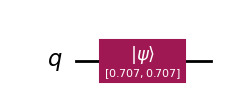

In [3]:
# Importar las clases y módulos necesarios
from qiskit import QuantumRegister, QuantumCircuit
from math import sqrt

# Definir el estado deseado
desired_state = [1/sqrt(2), 1/sqrt(2)]

# Crear un registro cuántico con un solo qubit llamado "q"
qr = QuantumRegister(1, "q")

# Crear un circuito cuántico
qc = QuantumCircuit(qr)

# Inicializar el qubit al estado deseado
qc.initialize(desired_state, qr[0])

# Dibujar el circuito cuántico
qc.draw(output='mpl')


Puertas cuánticas para un qubit (Hadamard, X, Y y Z)

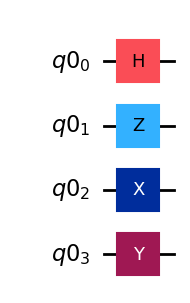

In [4]:
#Importar las clases y módulos necesarios
from qiskit import QuantumRegister , QuantumCircuit

# Crear un registro cuántico con 4 qubits
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

# Aplicar las puertas a los qubits específicos
qc.h(qr[0])  # Aplicar puerta H al qubit 0
qc.z(qr[1])  # Aplicar puerta Z al qubit 1
qc.x(qr[2])  # Aplicar puerta X al qubit 2
qc.y(qr[3])  # Aplicar puerta Y al qubit 3

# Dibujar el circuito
qc.draw(output='mpl')


Puerta cuántica CNOT

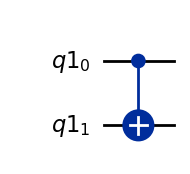

In [5]:
# Importar las clases y módulos necesarios
from qiskit import QuantumRegister, QuantumCircuit

qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

# Aplicar la puerta CNOT
qc.cx(qr[0], qr[1])
qc.draw(output='mpl')

PUuerta cuántica SWAP

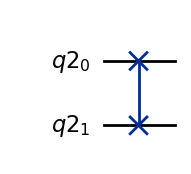

In [6]:
# Importar las clases y módulos necesarios
from qiskit import QuantumRegister, QuantumCircuit

qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

# Aplicar la puerta SWAP
qc.swap(qr[0], qr[1])
qc.draw(output='mpl')

Medición de un qubit

{'1': 100}


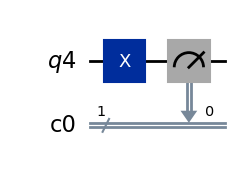

In [7]:
#Importamos las clases y módulos necesarios
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import Aer

# Crear el registro cuántico, registro clásico y el circuito cuántico
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

# Invertir el qubit qr y medirlo
qc.x(qr)
qc.measure(qr, cr)

# Ejecutar el circuito en el simulador cuántico
backend = Aer.get_backend('qasm_simulator')
qc_transpiled = transpile(qc, backend)

# Ejecutar el circuito en el simulador
qjob = backend.run(qc_transpiled, shots=100)
measurement = qjob.result().get_counts()
print(measurement)
qc.draw(output='mpl')

Medición de un qubit aplicando Hadamard

{'1': 64, '0': 36}


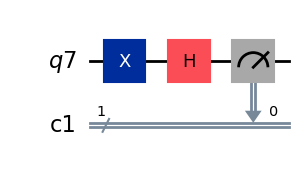

In [8]:
#Importamos las clases y módulos necesarios
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import Aer

# Creación del registro cuántico, registro clásico y el circuito cuántico
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

qc.x(qr)

# Mapear la base de Hadamard a la base computacional aplicando H^{dag} = H en qr
qc.h(qr)
qc.measure(qr, cr)

# Ejecutar el circuito en el simulador
backend = Aer.get_backend('qasm_simulator')
qc_transpiled = transpile(qc, backend)

# Ejecutar el circuito en el simulador
qjob = backend.run(qc_transpiled, shots=100)
counts = qjob.result().get_counts()
print(counts)
qc.draw(output='mpl')


Ejemplo de un circuito cuántico

{'1010': 246, '1001': 244, '0101': 267, '0110': 267}


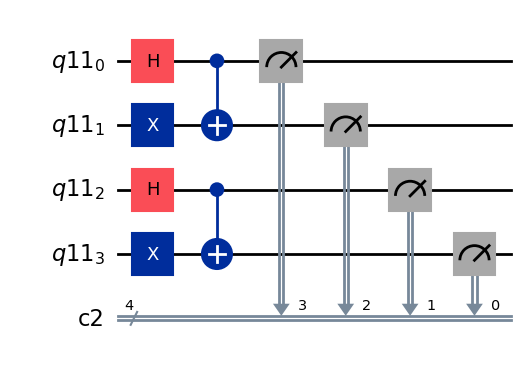

In [9]:
# Importar las clases y módulos necesarios
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import Aer

# Crear un circuito cuántico con 4 qubits y 4 bits clásicos
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr)

# Aplicar una puerta Hadamard al primer y tercer qubit
qc.h(0)
qc.h(2)

# Aplicar una puerta X (Pauli-X) al segundo y cuarto qubit
qc.x(1)
qc.x(3)

# Aplicar una puerta CNOT entre el primer qubit (control) y el segundo qubit (objetivo)
qc.cx(0, 1)

# Aplicar una puerta CNOT entre el tercer qubit (control) y el cuarto qubit (objetivo)
qc.cx(2, 3)

# Medir todos los qubits y almacenar el resultado en los bits clásicos correspondientes
for i in range(4):
    qc.measure(qr[i], cr[3 - i])

# Transpila el circuito para el backend deseado
backend = Aer.get_backend('qasm_simulator')
qc_transpiled = transpile(qc, backend)

# Ejecuta el circuito en el simulador
result = backend.run(qc_transpiled).result()

# Obtiene los resultados
counts = result.get_counts()

# Imprime los resultados
print(counts)

# Dibujar el circuito
qc.draw(output='mpl')


Oráculo

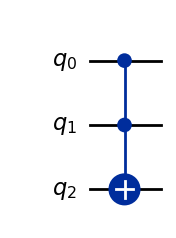

In [10]:
# Importar las clases y módulos necesarios
from qiskit import *

# Definir la función que devuelve el circuito cuántico del oráculo U_F para la función AND

def oracle ():
    circ = QuantumCircuit (3)
    circ.ccx(0,1,2)
    return circ

# Definir el circuito oráculo
circuito_oraculo = oracle()

# Dibujar el circuito
circuito_oraculo.draw(output='mpl')


Algoritmo de Deutsch-Jozsa

{'0111': 1024}


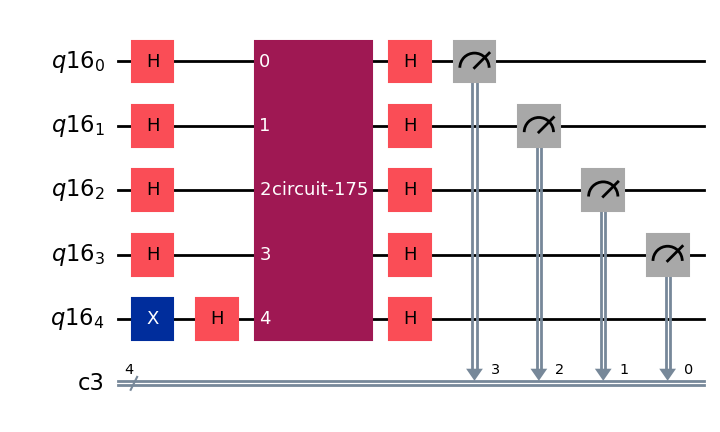

In [11]:
# Importa los módulos necesarios
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import Aer

# Construye un oráculo para la función f(x) = x2 xor x3 xor x4
orcl = QuantumCircuit(5)
orcl.cx(1, 4)
orcl.cx(2, 4)
orcl.cx(3, 4)
oracle = orcl.to_instruction()

# Crea registros cuánticos y clásicos
q = QuantumRegister(5)
c = ClassicalRegister(4)
qc = QuantumCircuit(q, c)

# Implementa el algoritmo de Deutsch-Jozsa
qc.x(q[4])
qc.h(range(5))
qc.append(oracle, q)
qc.h(range(5))
for i in range(4):
    qc.measure(q[i], c[3 - i])
    
# Transpila el circuito para el backend deseado
backend = Aer.get_backend('qasm_simulator')
qc_transpiled = transpile(qc, backend)

# Ejecuta el circuito en el simulador
result = backend.run(qc_transpiled).result()

# Obtiene los resultados
counts = result.get_counts()

# Imprime los resultados
print(counts)

# Imprime el circuito
qc.draw(output='mpl')


Algoritmo de Grover

{'1111': 1, '0110': 96, '0010': 2, '1011': 1}


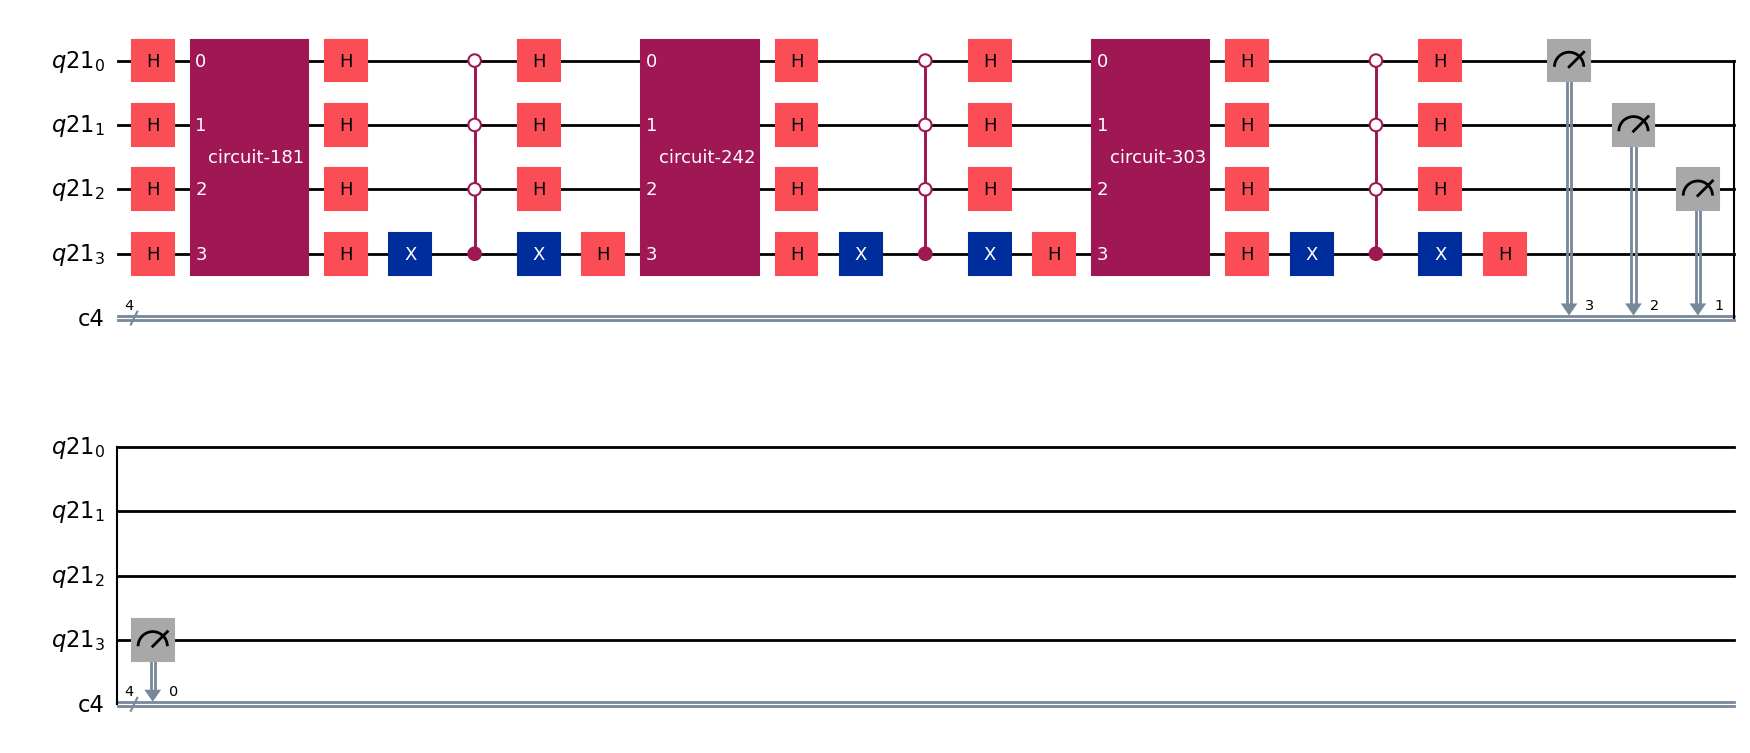

In [12]:
#Importamos los módulos necesarios
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import *

#Building an oracle for the function
#f(x)=x2x3+x1x2x3+x2x3x4+x1x2x3x4
#This is the U_f.
def oracle ():
    orcl = QuantumCircuit (4)
    orcl.x(3)
    orcl.append(ZGate ().control(3, ctrl_state='110'), range (4))
    orcl.x(3)
    return orcl

#Número de iteraciones implementadas
num_iter = 3

#Creación del registro cuántico, registro clásico
#y circuito cuántico
q = QuantumRegister (4)
c = ClassicalRegister (4)
qc = QuantumCircuit(q,c)

#Inicialización del estado inicial a superposición
qc.h(range (4))

#Implementación de la iteración de Grover
#por num_iter
for k in range(num_iter):
    qc.append(oracle (), range (4))
    qc.h(range (4))
    qc.x(3)
    qc.append(ZGate ().control(3, ctrl_state='000'),range (4))
    qc.x(3)
    qc.h(range (4))

#Medición the qubits
for i in range (4):
    qc.measure(i,3-i)

# Transpilar el circuito
backend = Aer.get_backend('qasm_simulator')
qc_transpiled = transpile(qc, backend)

# Ejecutar el circuito en el simulador
qjob = backend.run(qc_transpiled, shots=100)
counts = qjob.result().get_counts()
print(counts)
qc.draw(output='mpl')

Algoritmo de Grover incrementando las iteraciones

{'1111': 9, '0110': 11, '1011': 6, '0010': 6, '1110': 6, '0100': 7, '1101': 5, '1100': 9, '1000': 4, '1010': 8, '1001': 4, '0011': 8, '0101': 5, '0000': 5, '0001': 3, '0111': 4}


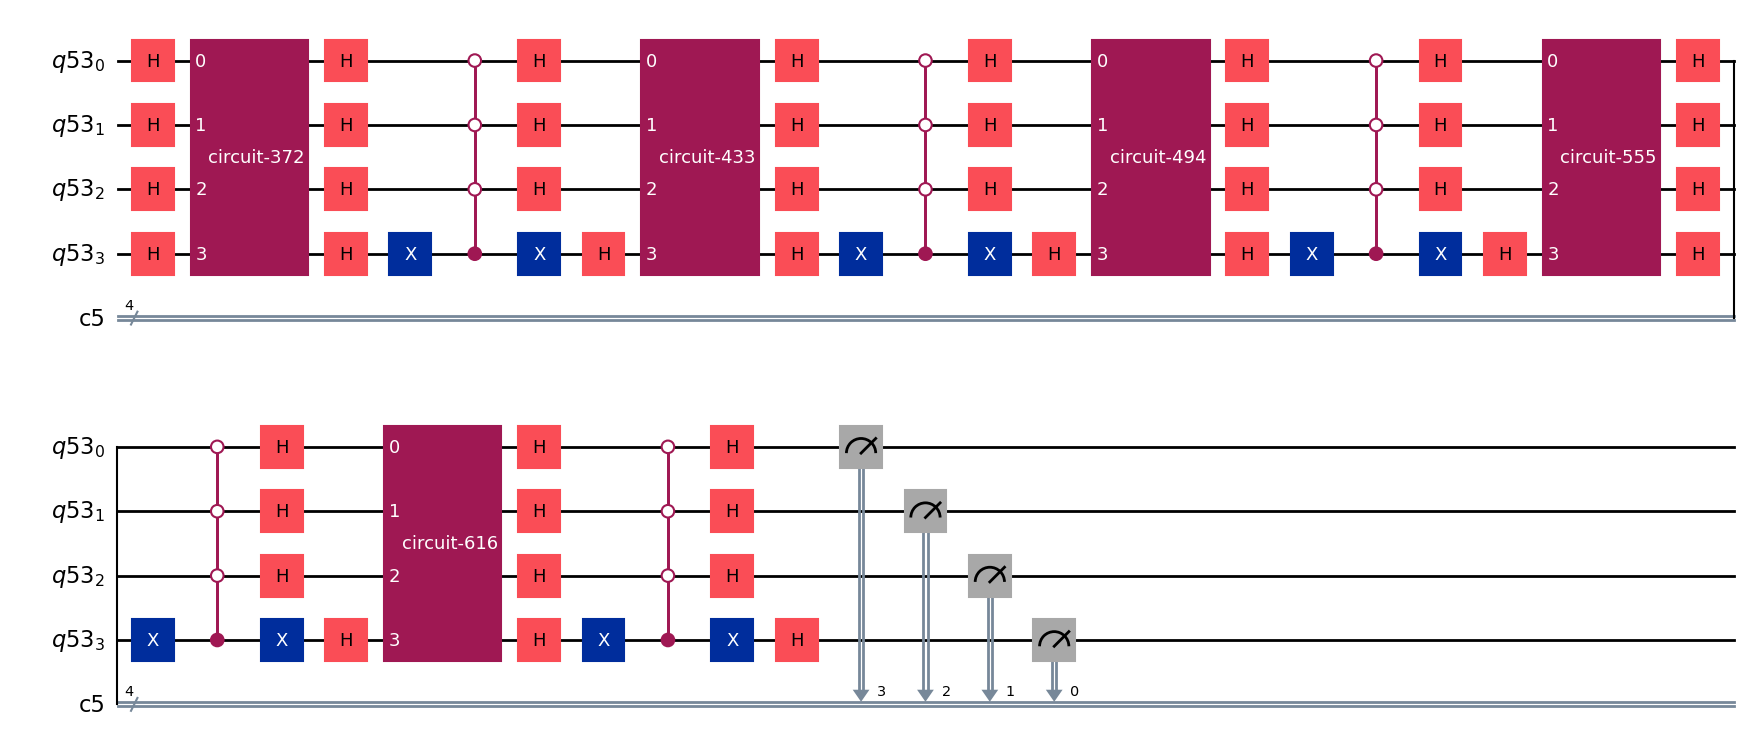

In [13]:
#Importamos los módulos necesarios
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import *

#Building an oracle for the function
#f(x)=x2x3+x1x2x3+x2x3x4+x1x2x3x4
#This is the U_f.
def oracle ():
    orcl = QuantumCircuit (4)
    orcl.x(3)
    orcl.append(ZGate ().control(3, ctrl_state='110'), range (4))
    orcl.x(3)
    return orcl

#Número de iteraciones implementadas (aquí lo que hacemos es ir incrementando el númerode iteraciones)
#num_iter = 1
#num_iter = 2
#num_iter = 3
#num_iter = 4
num_iter = 5


#Creación del registro cuántico, registro clásico
#y circuito cuántico
q = QuantumRegister (4)
c = ClassicalRegister (4)
qc = QuantumCircuit(q,c)

#Inicialización del estado inicial a superposición
qc.h(range (4))

#Implementación de la iteración de Grover
#por num_iter
for k in range(num_iter):
    qc.append(oracle (), range (4))
    qc.h(range (4))
    qc.x(3)
    qc.append(ZGate ().control(3, ctrl_state='000'),range (4))
    qc.x(3)
    qc.h(range (4))

#Medición the qubits
for i in range (4):
    qc.measure(i,3-i)

# Transpilar el circuito
backend = Aer.get_backend('qasm_simulator')
qc_transpiled = transpile(qc, backend)

# Ejecutar el circuito en el simulador
qjob = backend.run(qc_transpiled, shots=100)
counts = qjob.result().get_counts()
print(counts)
qc.draw(output='mpl')